# 2. Computing Emotion-Connectome

In [2]:
from src import *

/Users/michaelc.c.h/opt/miniconda3/envs/brain/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Description

From 50 items recorded over time during a movie session. We look at the connectivity matrices of the items among themselves and plot its connectivity gradients distribution.

GOAL: Gradient of emotion connectome and comparison with affective plot.

## Table of Contents
- [Emotion Connectome](#emotion)

- [Affective Score Ref](#affective)

In [3]:
emo_df = pd.read_csv('./data/emotion_compileBIDS.csv')

In [22]:
# matching valence arousal plot
# shortlist = ["Tense","Nervous", "Upset", "Sad", "Depreseed", "Bored", "Relaxed", "Serene", "Contented", "Happy", "Excited", "Alert"]
select = ['Anger','Guilt','WarmHeartedness', 'Disgust','Happiness','Fear','Regard','Anxiety', 'Satisfaction','Pride','Surprise','Love','Sad']

timeseries = [np.array(emo_df[emo_df['item']==e]['score'])
             for e in emo_df.item.unique()]
timeseries = np.array(timeseries)

<a class="anchor" id="emotion"></a>
### Emotion Connectome

In [23]:
correlation_measure = ConnectivityMeasure(kind='correlation')
correlation_matrix  = correlation_measure.fit_transform([timeseries.T])[0]

In [24]:
# shift up the correlation matrix : interpretation higher relative correlation when NO correlation than when anti-correlated
pos_corr = correlation_matrix - correlation_matrix.min()
pos_corr = pos_corr / pos_corr.max()

In [25]:
emo_g = GradientMaps(n_components=10, approach='dm', kernel='pearson', random_state=10)
emo_g.fit(pos_corr)

/Users/michaelc.c.h/opt/miniconda3/envs/brain/lib/python3.8/site-packages/brainspace/gradient/embedding.py:77: UserWarning: Graph is not fully connected.
  warnings.warn('Graph is not fully connected.')


GradientMaps(kernel='pearson', random_state=10)

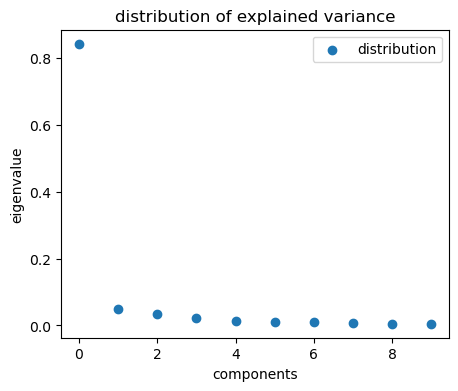

In [26]:
plot_eigenvector_importance(emo_g)

Text(0, 0.5, 'gradient2')

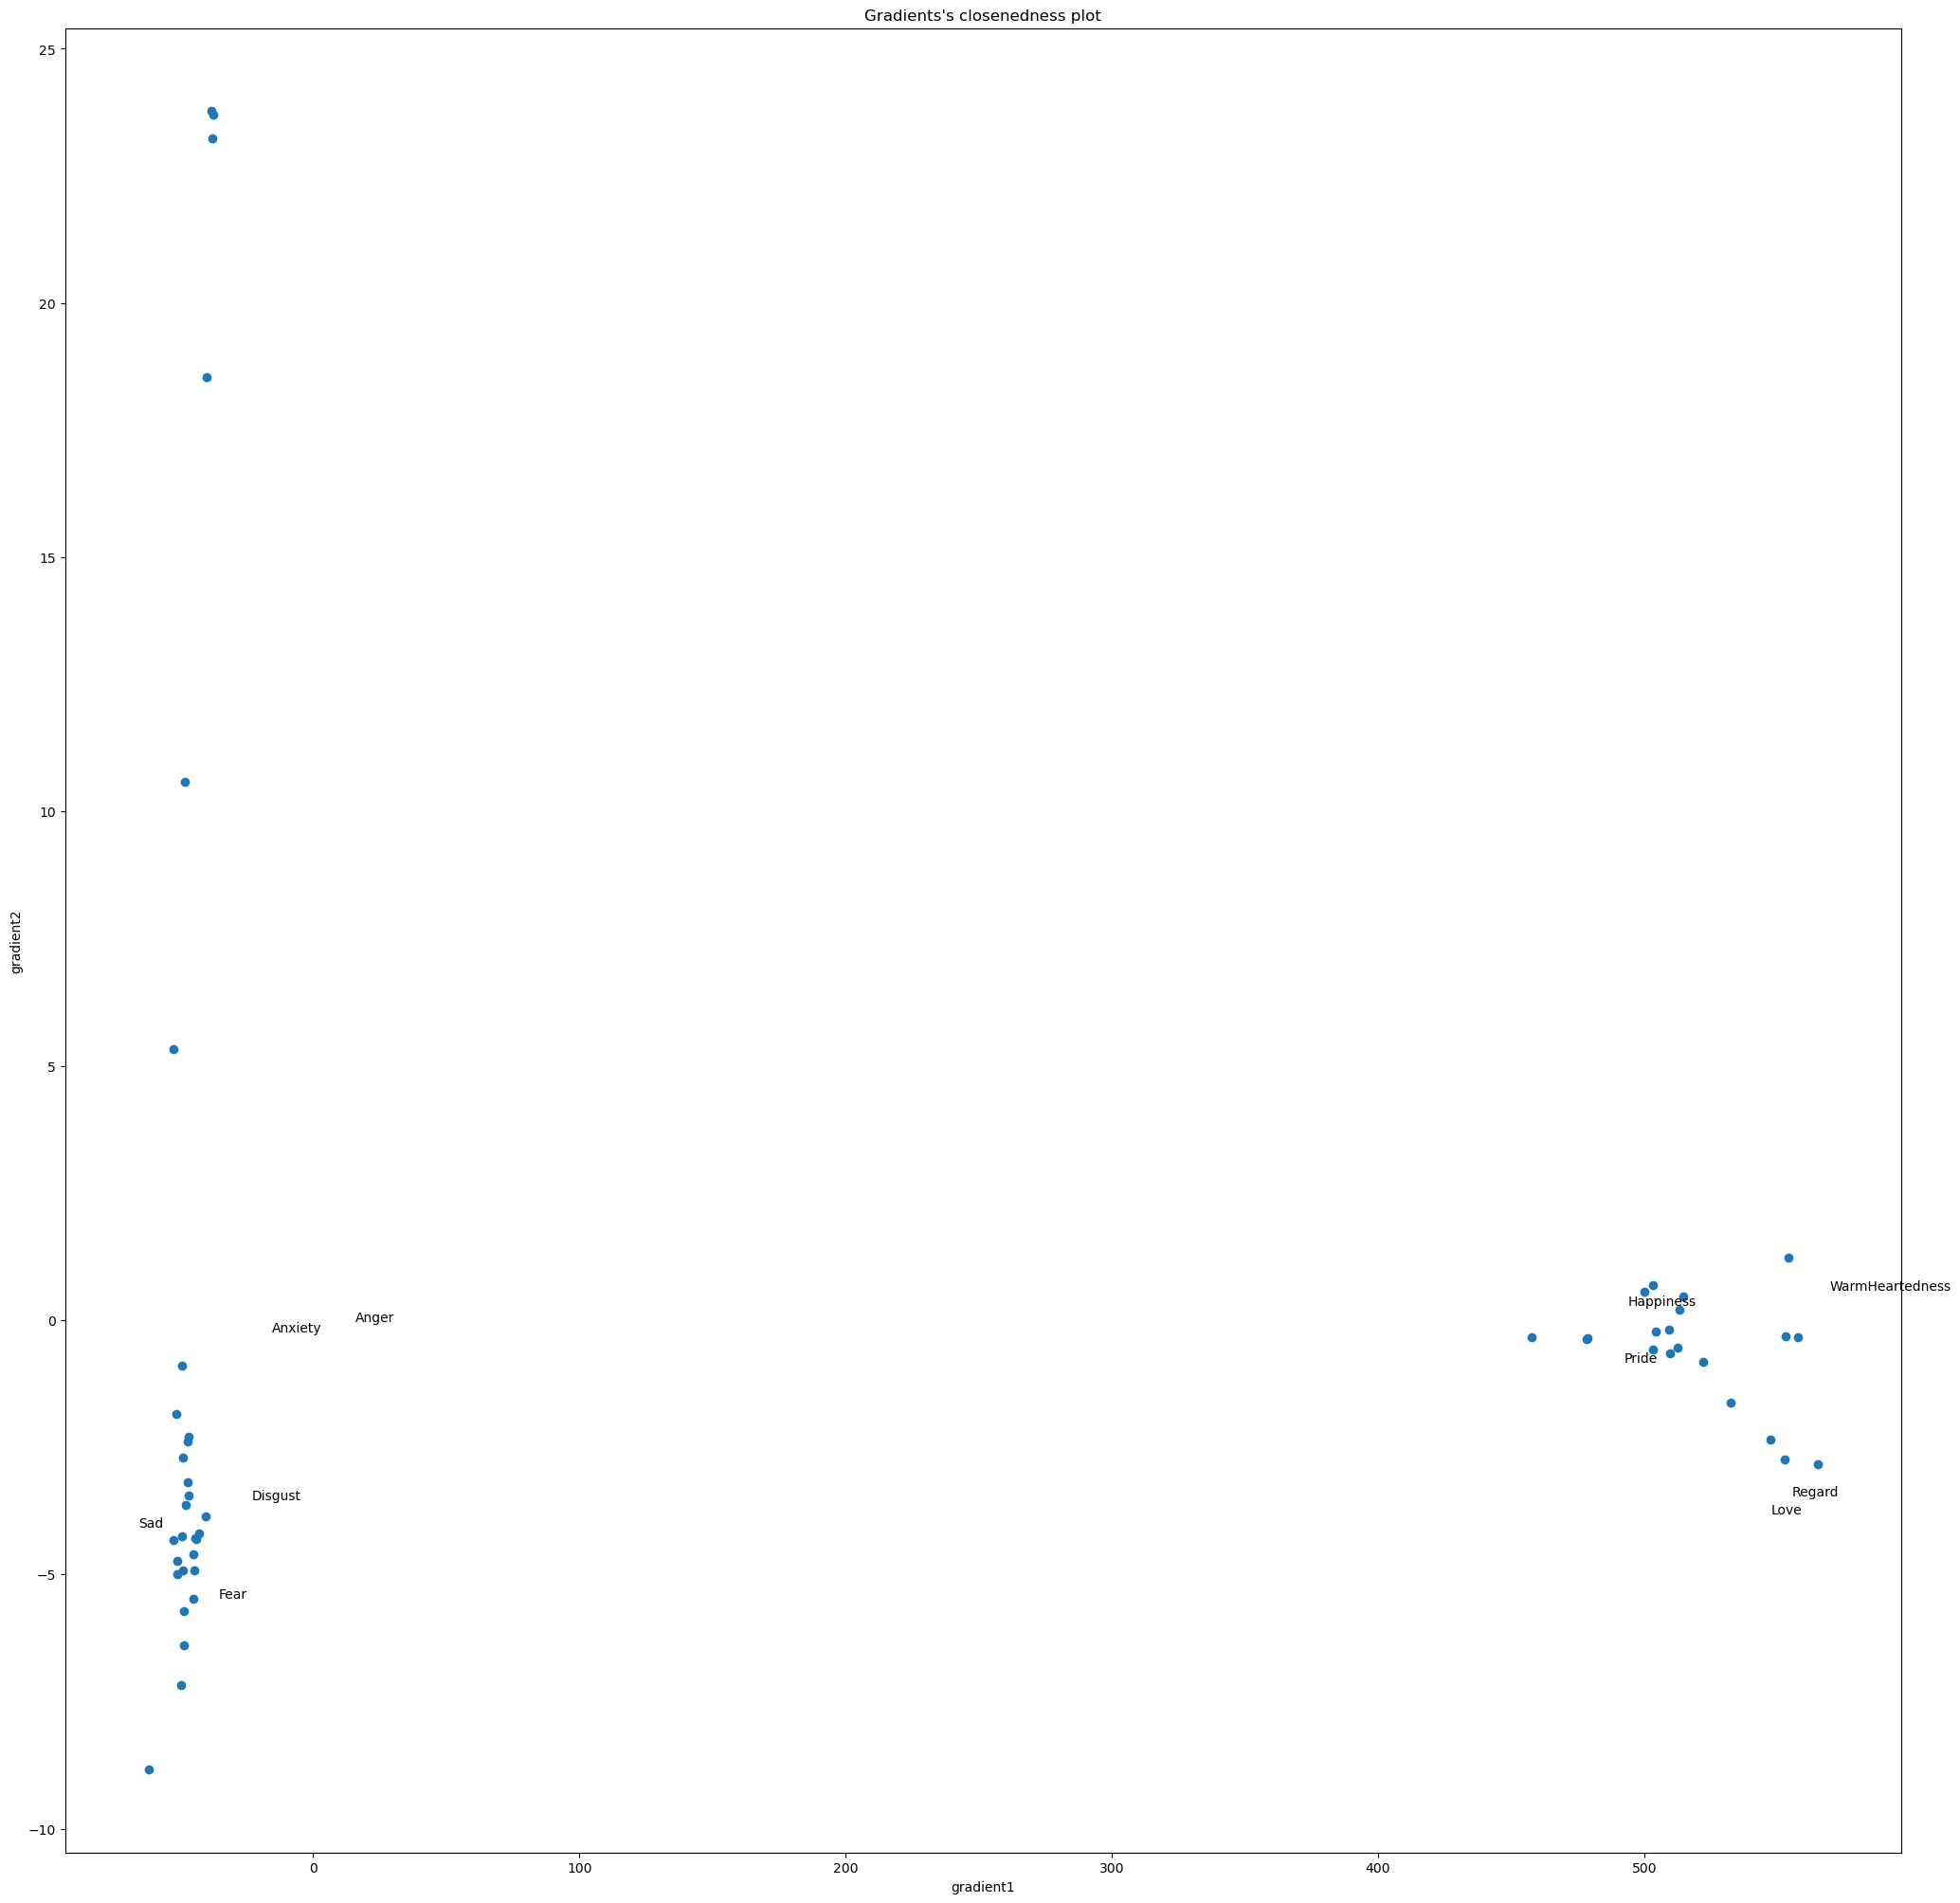

In [27]:
import random 
random.seed(2)
fig, ax = plt.subplots(1,1,figsize=(25,25))
ax.scatter(emo_g.gradients_[:,0], emo_g.gradients_[:,1])

scalerX = emo_g.gradients_[:,0].max()
scalerY = emo_g.gradients_[:,1].max()
for i, txt in enumerate(emo_df.item.unique()):
    if txt not in select: 
        continue
    spacingX = scalerX * (random.random()-0.5)/4
    spacingY = scalerY * (random.random()-0.5)/4
    ax.annotate(txt, (emo_g.gradients_[:,0][i] + spacingX,
                      emo_g.gradients_[:,1][i] + spacingY  ) )

ax.set_title("Gradients's closenedness plot")
ax.set_xlabel("gradient1")
ax.set_ylabel("gradient2")

<a class="anchor" id="affective"></a>
### Affective Score Ref

(-0.5, 599.5, 531.5, -0.5)

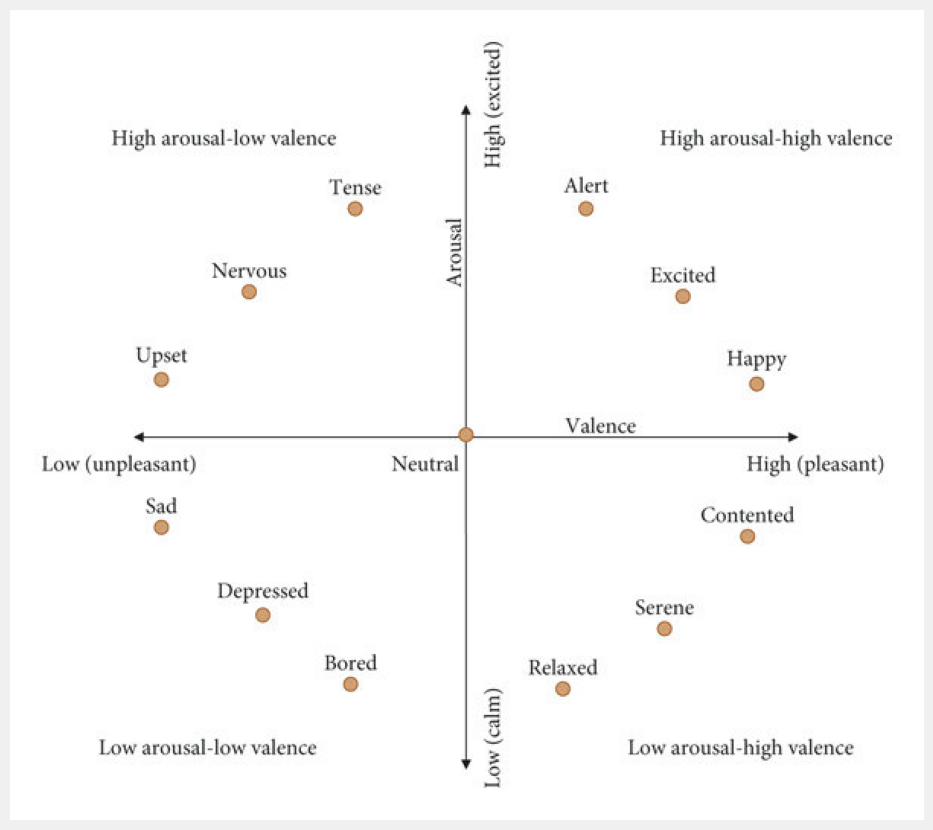

In [22]:
overlay = cv2.imread("./media/emotion_valence_arousal.jpg")
plt.figure(figsize=(25,10))
plt.imshow(overlay)
plt.axis('off')